#### Discrete Fourier Transform

Paul J. Atzberger  <br>
http://atzberger.org <br>


**Discrete Fourier Transform (DFT)**

The transform is defined for a function sampled as $u_m = u(x_m)$ at locations $x_m = m L/n$ on the interval $[0,L]$.  The DFT is
$$
\hat{u}_k = \mathcal{F}_k[\{{u}_m\}] = \frac{1}{n}\sum_{m=0}^{n-1} u_m e^{-i2\pi k m/n}.
$$

**Inverse Discrete Fourier Transform (IDFT)**

The function is reconstructed at the lattice sites $x_m$ using the inverse transform (IDFT) given by
$$
u_m = \mathcal{F}_m^{-1}[\{\hat{u}_k\}] = \sum_{k=0}^{n-1} \hat{u}_k e^{i2\pi k m/n}.
$$

This can also be expressed as 
$$
\{\hat{u}_k\}_{k=0}^{n-1} = \mathcal{F}[\{{u}_m\}_{m=0}^{n-1}], \;\;\;
\{\hat{u}_m\}_{m=0}^{n-1} = \mathcal{F}^{-1}[\{\hat{u}_k\}_{k=0}^{n-1}].
$$


In [109]:
import matplotlib.pyplot as plt; 
import numpy as np; 

# NOTE: when using the numpy library relative to our definitions we have 
#
# u_k = n*np.ifft(u_m)
# u_m = (1/n)*np.fft(u_k)

def idft(a, n=None, axis=-1, norm=None):    
  u_k = n*np.fft.ifft(a,n,axis,norm);
  return u_k;
    
def dft(a, n=None, axis=-1, norm=None):    
  u_m = (1/n)*np.fft.fft(a,n,axis,norm);
  return u_m;


#### Function Sampling and Reconstruction

We give a brief demonstration of how a function can be sampled on the lattice and reconstructed using the DFTs. 

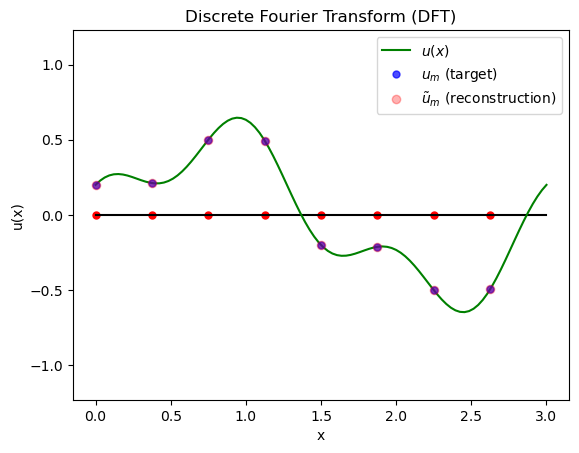

In [110]:
plt.figure('func1');
plt.clf();

def func_u(x,p):
  k1 = p['k1']; k2 = p['k2'];
  ux = 0.2*np.cos(k1*2*np.pi*x/L);
  ux += 0.5*np.sin(k2*2*np.pi*x/L);

  return ux;

n = 8;

L = 3;

dx = L/n;
x_m = np.linspace(0,n-1,n)*dx;

x = np.linspace(0,L,100);

p = {'k1':3.0,'k2':1.0};
ux = func_u(x,p);
u_m = func_u(x_m,p);

plt.plot(x_m,0*x_m,'r.',ms=10);
plt.plot(x,0*x,'k-',ms=10);

plt.plot(x,ux,'g-',label=r'$u(x)$');
plt.plot(x_m,u_m,'b.',ms=10,alpha=0.7,label=r'$u_m$ (target)');

u_k = dft(u_m,n);
tilde_u_m = idft(u_k,n);

plt.plot(x_m,tilde_u_m,'r.',ms=12,alpha=0.3,label=r'$\tilde{u}_m$ (reconstruction)');

ax = plt.gca();
plt.axis('equal');

plt.xlabel('x');
plt.ylabel('u(x)');

plt.title('Discrete Fourier Transform (DFT)');

plt.legend();

plt.draw();


#### Function Sampling and Reconstruction (Aliasing)

As discussed in lecture, high frequency modes may look the same when sampled on the discrete lattice.  This can prevent accurate reconstruction of the intended underlying function and also lead to other aliasing artifacts.  As we derived in lecture we can not distinguish on the lattice between modes $k$ and $k' = k + \alpha\cdot n$ where $\alpha \in \mathbb{Z}$.  As a result, if we have a periodic function with Fourier expansion $u(x) = \sum_{k=-\infty}^{\infty} \hat{\mathbb{u}}_k e^{i2\pi k m/n}$ the DFT will give
$$
\hat{u}_k = \sum_{\alpha = -\infty}^{\infty} \hat{\mathbb{u}}_{k + \alpha n}.
$$

As a consequence, we have to be careful that we choose our sampling $n$ sufficiently large to resolve the relevant properties of the functions we are approximating and be careful how we interpret results.  This gives some intuition and we also will develop bounds to help control these issues.  Below we give an illustration related to our in-class discussions of two functions which manifest the same on the lattice $x_m$.   Feel free to also try out other frequencies $k_1$ or modify `func_u()` to explore how different functions behave. 


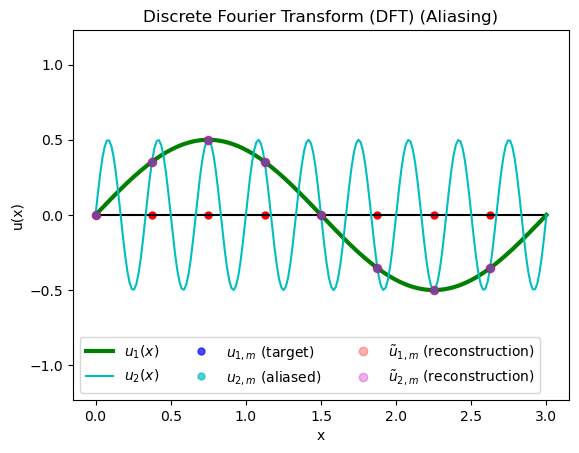

In [111]:
plt.figure('func1');
plt.clf();

def func_u(x,p):
  k1 = p['k1']; k2 = p['k2'];
  ux = 0.5*np.sin(k1*2*np.pi*x/L);
  #ux += 0.5*np.sin(k2*2*np.pi*x/L);

  return ux;

n = 8;

L = 3;

dx = L/n;
x_m = np.linspace(0,n-1,n)*dx;

x = np.linspace(0,L,200);

p1 = {'k1':1.0,'k2':1.0};
u1x = func_u(x,p1);
u1_m = func_u(x_m,p1);

p2 = {'k1':1.0 + n,'k2':1.0};
u2x = func_u(x,p2);
u2_m = func_u(x_m,p2);

plt.plot(x_m,0*x_m,'r.',ms=10);
plt.plot(x,0*x,'k-',ms=10);

plt.plot(x,u1x,'g-',lw=3,label=r'$u_1(x)$');
plt.plot(x,u2x,'c-',label=r'$u_2(x)$');
plt.plot(x_m,u1_m,'b.',ms=10,alpha=0.7,label=r'$u_{1,m}$ (target)');
plt.plot(x_m,u2_m,'c.',ms=10,alpha=0.7,label=r'$u_{2,m}$ (aliased)');

u1_k = dft(u1_m,n);
tilde_u1_m = idft(u1_k,n);
plt.plot(x_m,tilde_u1_m,'r.',ms=12,alpha=0.3,label=r'$\tilde{u}_{1,m}$ (reconstruction)');

u2_k = dft(u2_m,n);
tilde_u2_m = idft(u2_k,n);
plt.plot(x_m,tilde_u2_m,'m.',ms=12,alpha=0.3,label=r'$\tilde{u}_{2,m}$ (reconstruction)');

ax = plt.gca();
plt.axis('equal');

plt.xlabel('x');
plt.ylabel('u(x)');

plt.title('Discrete Fourier Transform (DFT) (Aliasing)');

plt.legend(loc="lower left", ncol=3)

plt.draw();
